In [ ]:
import math
import networkx as nx
import matplotlib.pyplot as plt

import plotly.graph_objects as go

#1. Represent a simple organizational chart or file system structure using an indented list (text-based or using basic HTML)

In [ ]:
data = {
    "CEO": {
        "CTO": {
            "Backend Team": {
                "Dev A": {},
                "Dev B": {}
            },
            "Frontend Team": {
                "Dev C": {}
            }
        },
        "CFO": {
            "Accounts": {
                "Accountant A": {},
                "Accountant B": {}
            }
        },
        "COO": {
            "Operations": {
                "Ops A": {}
            },
            "Support": {
                "Support A": {},
                "Support B": {}
            }
        }
    }
}


### 1. Indented List Representation

Indented lists are simple textual representations of hierarchical data.
They are easy to read for small hierarchies but do not visually show connections.


In [ ]:
def print_indented(data, level=0):
    for key in data:
        print("  " * level + "- " + key)
        print_indented(data[key], level + 1)

print_indented(data)


- CEO
  - CTO
    - Backend Team
      - Dev A
      - Dev B
    - Frontend Team
      - Dev C
  - CFO
    - Accounts
      - Accountant A
      - Accountant B
  - COO
    - Operations
      - Ops A
    - Support
      - Support A
      - Support B


### 2. Node-Link Tree Diagram

Node-link diagrams represent hierarchical data using nodes (entities)
and links (relationships). This visualization clearly shows parent–child
connections but may become cluttered for large datasets.

Shows parent → child relationships using arrows.

In [ ]:
def print_node_link(data, parent=None):
    for key in data:
        if parent:
            print(parent, "->", key)
        print_node_link(data[key], key)

print_node_link(data)


CEO -> CTO
CTO -> Backend Team
Backend Team -> Dev A
Backend Team -> Dev B
CTO -> Frontend Team
Frontend Team -> Dev C
CEO -> CFO
CFO -> Accounts
Accounts -> Accountant A
Accounts -> Accountant B
CEO -> COO
COO -> Operations
Operations -> Ops A
COO -> Support
Support -> Support A
Support -> Support B


###3. Radial Tree Layout

Radial tree layouts place the root node at the center and arrange
child nodes in circular layers. This layout is compact and visually
appealing but labels may overlap for large hierarchies.

Nodes are shown by depth levels (distance from center).


In [ ]:
def print_radial(data, level=0):
    for key in data:
        print(f"Level {level}: {key}")
        print_radial(data[key], level + 1)

print_radial(data)


Level 0: CEO
Level 1: CTO
Level 2: Backend Team
Level 3: Dev A
Level 3: Dev B
Level 2: Frontend Team
Level 3: Dev C
Level 1: CFO
Level 2: Accounts
Level 3: Accountant A
Level 3: Accountant B
Level 1: COO
Level 2: Operations
Level 3: Ops A
Level 2: Support
Level 3: Support A
Level 3: Support B


## Comparison of Visualizations

- **Indented List:** Simple and readable, but not visual.
- **Node-Link Tree:** Clearly shows parent–child relationships.
- **Radial Tree:** Compact and aesthetic, but may suffer from label overlap.

Each technique is useful depending on data size and analysis requirements.


#2. (Using a visualization library) Create a basic node-link tree diagram for a small hierarchical dataset

This below code dynamically visualizes hierarchical data using NetworkX.
The node positions are generated automatically based on the hierarchy.

In [ ]:
labels = []
parents = []

def build_lists(tree, parent=""):
    for key in tree:
        labels.append(key)
        parents.append(parent)
        build_lists(tree[key], key)

build_lists(data)


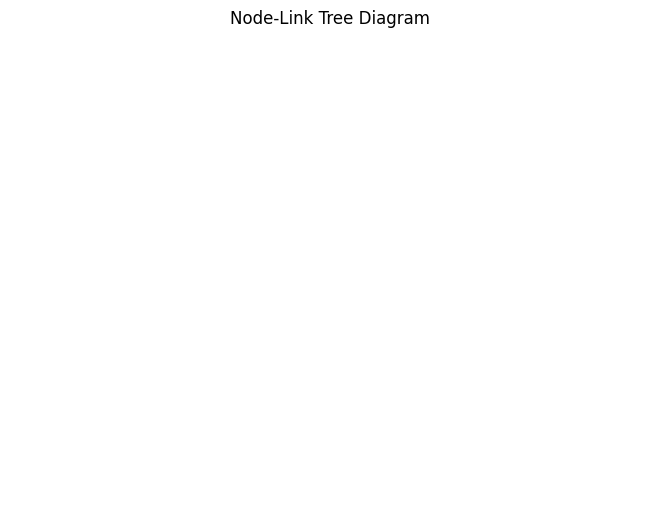

In [ ]:
G = nx.DiGraph()
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=800)
plt.title("Node-Link Tree Diagram")
plt.show()

#3. (Using a visualization library) Explore radial tree layouts for the same data and compare their effectiveness.

In [ ]:
G = nx.DiGraph()

def add_nodes(tree, parent=None):
    for node, children in tree.items():
        if parent:
            G.add_edge(parent, node)
        add_nodes(children, node)

add_nodes(data)


In [ ]:
labels = []
parents = []

def build_plotly_lists(data, parent=""):
    for key in data:
        labels.append(key)
        parents.append(parent)
        build_plotly_lists(data[key], key)

build_plotly_lists(data)


In [ ]:
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents
))

fig.update_layout(title="Hierarchical Data Visualization (Plotly)")
fig.show()


In [ ]:
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents
))

fig.update_layout(title="Radial Tree Layout (Hierarchical Data)")
fig.show()
